# Homework: Sentiment Analysis with Yelp Review Dataset


## What is the Yelp Dataset?

This dataset is derived from Yelp reviews, where each review expresses a sentiment (1 to 5 stars) about a particular service, product, or experience. The task focuses on analyzing these reviews to extract the sentiment conveyed.





##  Motivation

Yelp is a platform where users share their experiences and opinions about various businesses, such as restaurants, stores, and services. By analyzing these reviews, we can gain insights into customer satisfaction, identify trends in consumer behavior, and understand the general perception of different businesses. This analysis can be valuable for businesses aiming to improve their services based on customer feedback.


## Problem Statement

The task is to classify each review based on its star rating, ranging from 1 to 5 stars, reflecting the sentiment expressed by the user.
This analysis will help understand the general perception of various businesses and services based on user feedback, providing valuable insights into
customer satisfaction and areas for improvement for businesses.



## What Do We Expect from You in This Assignment?

We expect you to use NLP techniques and potentially deep learning methods to analyze the text data from Yelp reviews. Your goal is to accurately classify each review based on its star rating, ranging from 1 to 5 stars.
This classification will help interpret the sentiment expressed in each review, giving insights into customer satisfaction levels across different businesses.


## Dataset Information

The Yelp dataset consists of two files:

- `yelp_review_train`: Training dataset containing labeled reviews for model training.
- `yelp_review_test`: Validation dataset for evaluating the model's performance on unseen data.

Each review is associated with a `label` ranging from 0 to 4, where:
- `label 0`: 1 star
- `label 1`: 2 stars
- `label 2`: 3 stars
- `label 3`: 4 stars
- `label 4`: 5 stars

https://huggingface.co/datasets/Yelp/yelp_review_full

The code provided below (Chapter 2) includes a step to map these labels to their corresponding star ratings for better interpretability.

## If you have any question about the homework, you can contact us at the following e-mail adresses:

*   ozgeflzcn@gmail.com
*   burcusunturlu@gmail.com



## Additional Notes

* Ensure all models and visualizations are well-commented.
* Include all explanations for key steps like tokenization, vectorization, hyperparameter tuning, model selection and performance.
* Please complete your homework using this notebook.
* We recommend using Google Colab for your project and exploring the Hugging Face platform.

## 1 - Import Libraries

Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful):

*   Pandas
*   Numpy
*   Sklearn
*   nltk
*   keras

## 2 - Importing the Data (60 points)

## 2.1 - Loading the Data


*   You can easly import datasets from Hugging Face platform


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets from the Hugging Face datasets library
splits = {'train': 'yelp_review_full/train-00000-of-00001.parquet',
           'test': 'yelp_review_full/test-00000-of-00001.parquet'}
train_df = pd.read_parquet("hf://datasets/Yelp/yelp_review_full/" + splits["train"])
test_df = pd.read_parquet("hf://datasets/Yelp/yelp_review_full/" + splits["test"])

# Create a 20% subset from the df_train DataFrame
train_df, _ = train_test_split(train_df, test_size=0.8, stratify=train_df['label'], random_state=42)

# Create a 20% subset from the df_test DataFrame
test_df, _ = train_test_split(test_df, test_size=0.8, stratify=test_df['label'], random_state=42)

# Map labels to star ratings
label_to_star = {0: '1 star', 1: '2 stars', 2: '3 stars', 3: '4 stars', 4: '5 stars'}
train_df['star_rating'] = train_df['label'].map(label_to_star)
test_df['star_rating'] = test_df['label'].map(label_to_star)

# Display the first few rows to confirm the mapping
print(train_df.head())
print(test_df.head())

        label                                               text star_rating
312157      1  Alright, so I've been here twice.  The atmosph...     2 stars
626104      2  The hotel overall is not bad. One major issue ...     3 stars
170329      2  Been here about 15 years ago, when it was fair...     3 stars
131769      1  This place was, eh, okay...but I probably won'...     2 stars
517274      2  This review will take the form of a note to my...     3 stars
       label                                               text star_rating
19761      0  SAGE IS  NOW UNDER NEW MANAGEMENT!! Food porti...      1 star
46153      0  Tried out this joint since I'm a real ramen lo...      1 star
46781      4  Superb!  My husband and I LOVE Glenway Premium...     5 stars
27598      2  Eh, this market was OK, but it didn't do it fo...     3 stars
25156      0  OK heres the deal...I went here on a sunday ju...      1 star


C:\Users\Muhammed Ali Sezer\AppData\Local\Temp\ipykernel_7620\2232052923.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


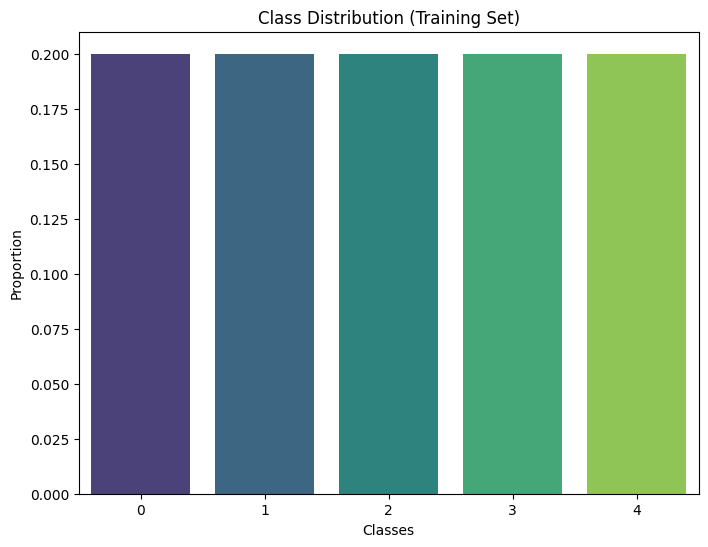

C:\Users\Muhammed Ali Sezer\AppData\Local\Temp\ipykernel_7620\2232052923.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")


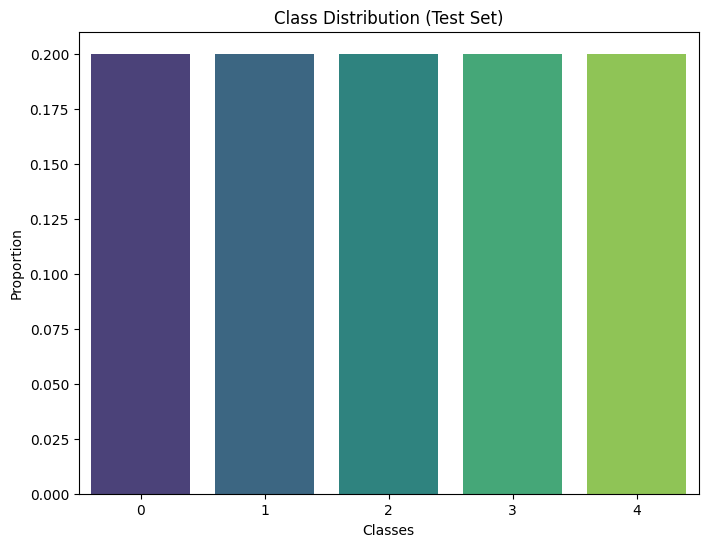

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking class distribution
class_distribution = train_df['label'].value_counts(normalize=True)

# Visualizing class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution (Training Set)")
plt.xlabel("Classes")
plt.ylabel("Proportion")
plt.show()

test_class_distribution = test_df['label'].value_counts(normalize=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution (Test Set)")
plt.xlabel("Classes")
plt.ylabel("Proportion")
plt.show()


#2.1 - Data Loading and Initial Processing Results

Steps Taken:

The Yelp dataset was successfully downloaded from the Hugging Face platform.
20% subsets were created from the training and test datasets to improve processing time and simplify analysis.
Class balance was preserved while splitting the data.
Findings and Insights:

Classes were evenly distributed. Each class accounts for 20% of the training dataset.
No missing values were found, confirming that the dataset is clean and ready for further analysis.

## 2.2 - Exploratory Data Analysis (EDA) (20 points)

Please investigate your data according to 'label' or 'length_category_for_eda' columns:
* Check distributions. Visualize the data distribution across length of text categories (very short to very long).
* Check null values.
* Analyze the relationship between text length and labels.
* Create word clouds for frequently used words in each category of positive, negative, and neutral reviews.(1,2 stars negative ; 3 neutral ; 4,5 positive reviews)

In [3]:
def categorize_text_length_extended(length):
    if length <= 300:
        return "very short"
    elif 301 <= length <= 600:
        return "short"
    elif 601 <= length <= 900:
        return "medium"
    elif 901 <= length <= 1200:
        return "long"
    else:
        return "very long"

# Adding a new column for text length (number of characters) and categorizing it with the extended categories
train_df['text_length'] = train_df['text'].apply(len)
train_df['length_category_for_eda'] = train_df['text_length'].apply(categorize_text_length_extended)

# Adding a new column for text length (number of characters) and categorizing it with the extended categories
test_df['text_length'] = test_df['text'].apply(len)
test_df['length_category_for_eda'] = test_df['text_length'].apply(categorize_text_length_extended)

In [4]:
# Check for missing values in the training dataset
train_missing_values = train_df.isnull().sum()

# Check for missing values in the test dataset
test_missing_values = test_df.isnull().sum()

# Display missing values
print("Missing Values in Training Data:")
print(train_missing_values)
print("\nMissing Values in Test Data:")
print(test_missing_values)


Missing Values in Training Data:
label                      0
text                       0
star_rating                0
text_length                0
length_category_for_eda    0
dtype: int64

Missing Values in Test Data:
label                      0
text                       0
star_rating                0
text_length                0
length_category_for_eda    0
dtype: int64


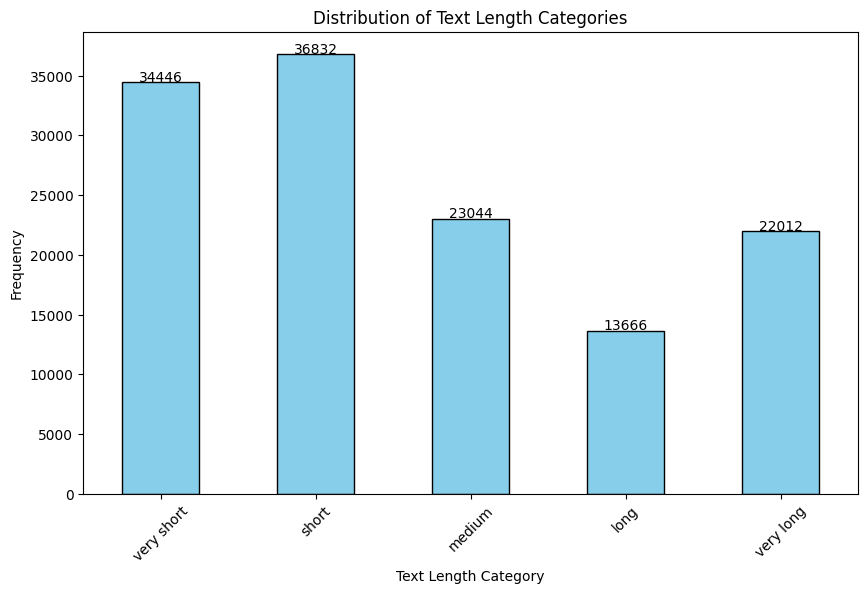

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom order for the length categories
category_order = ["very short", "short", "medium", "long", "very long"]
train_df['length_category_for_eda'] = pd.Categorical(
    train_df['length_category_for_eda'],
    categories=category_order,
    ordered=True
)

# Check the distribution of length categories in the training dataset
length_category_distribution = train_df['length_category_for_eda'].value_counts().sort_index()

# Visualize the distribution of text length categories

plt.figure(figsize=(10, 6))
length_category_distribution.plot(kind='bar', edgecolor='black', color='skyblue')
plt.title("Distribution of Text Length Categories")
plt.xlabel("Text Length Category")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
for i, value in enumerate(length_category_distribution.values):
    plt.text(i, value + 50, str(value), ha='center')  # Her barın üstüne değer ekleyelim
plt.show()



In [6]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ----- ---------------------------------- 2.6/19.1 MB 16.7 MB/s eta 0:00:01
   ----------------- ---------------------- 8.4/19.1 MB 22.6 MB/s eta 0:00:01
   -------------------------------- ------- 15.5/19.1 MB 26.3 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 26.7 MB/s eta 0:00:00


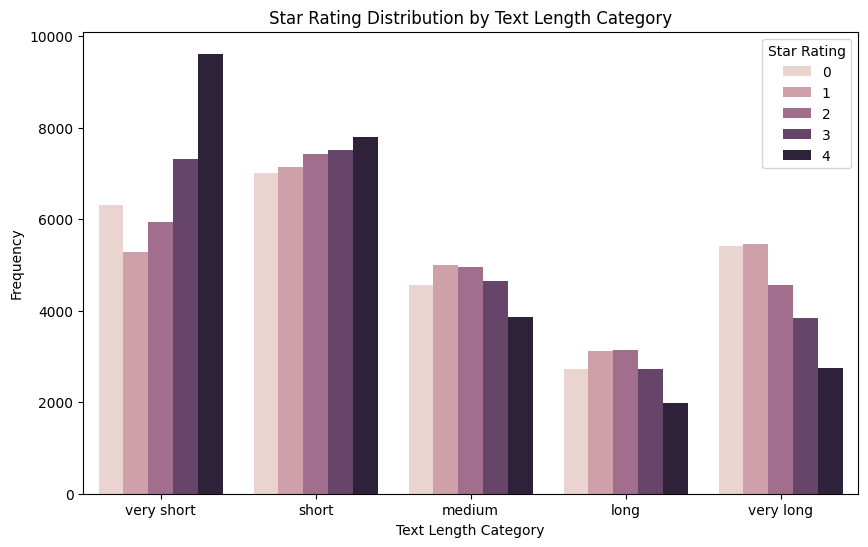

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom order for the length categories
category_order = ["very short", "short", "medium", "long", "very long"]
train_df['length_category_for_eda'] = pd.Categorical(
    train_df['length_category_for_eda'],
    categories=category_order,
    ordered=True
)

# Plot the countplot with the custom order
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='length_category_for_eda', hue='label', order=category_order)
plt.title('Star Rating Distribution by Text Length Category')
plt.xlabel('Text Length Category')
plt.ylabel('Frequency')
plt.legend(title="Star Rating", loc='upper right')
plt.show()

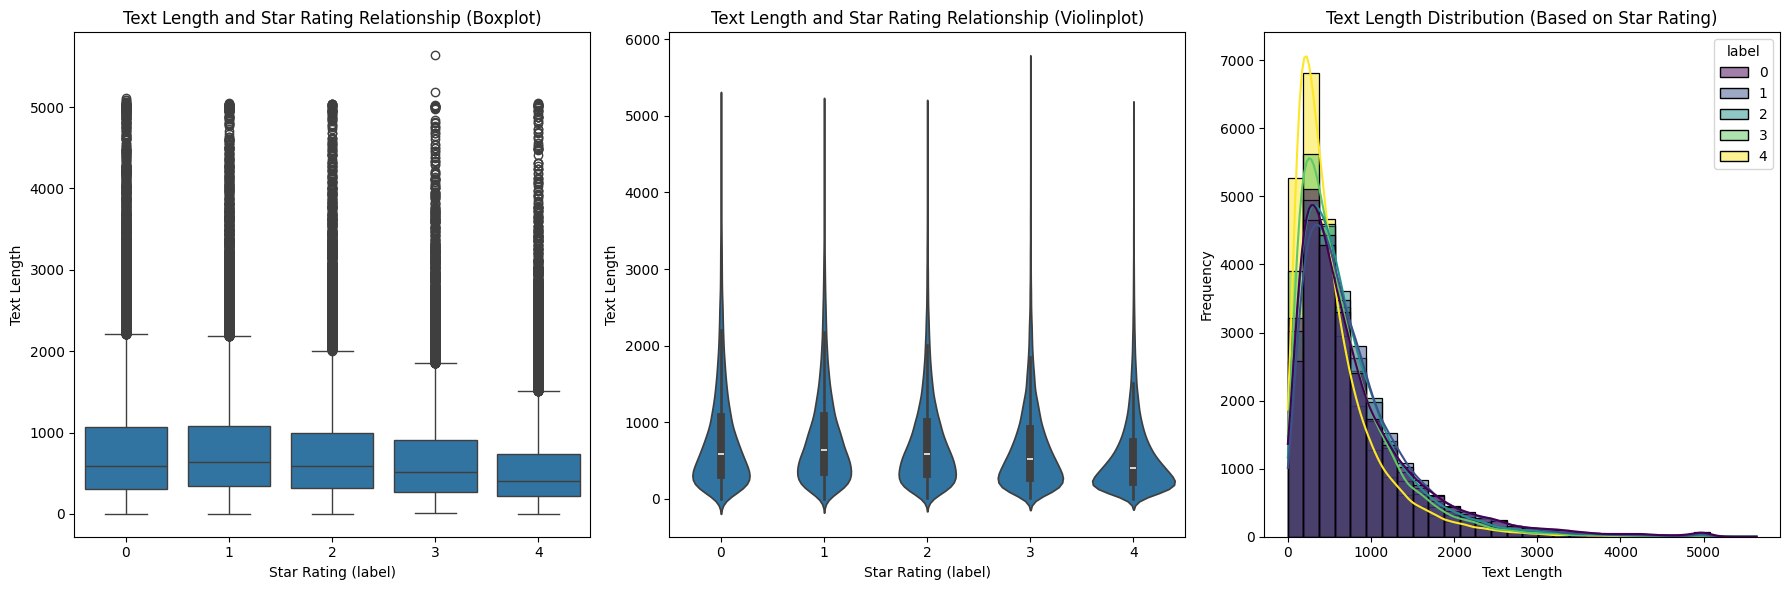

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(data=train_df, x='label', y='text_length')
plt.title("Text Length and Star Rating Relationship (Boxplot)")
plt.xlabel("Star Rating (label)")
plt.ylabel("Text Length")

# Violinplot
plt.subplot(1, 3, 2)
sns.violinplot(data=train_df, x='label', y='text_length')
plt.title("Text Length and Star Rating Relationship (Violinplot)")
plt.xlabel("Star Rating (label)")
plt.ylabel("Text Length")

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(data=train_df, x='text_length', hue='label', bins=30, kde=True, palette="viridis")
plt.title("Text Length Distribution (Based on Star Rating)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

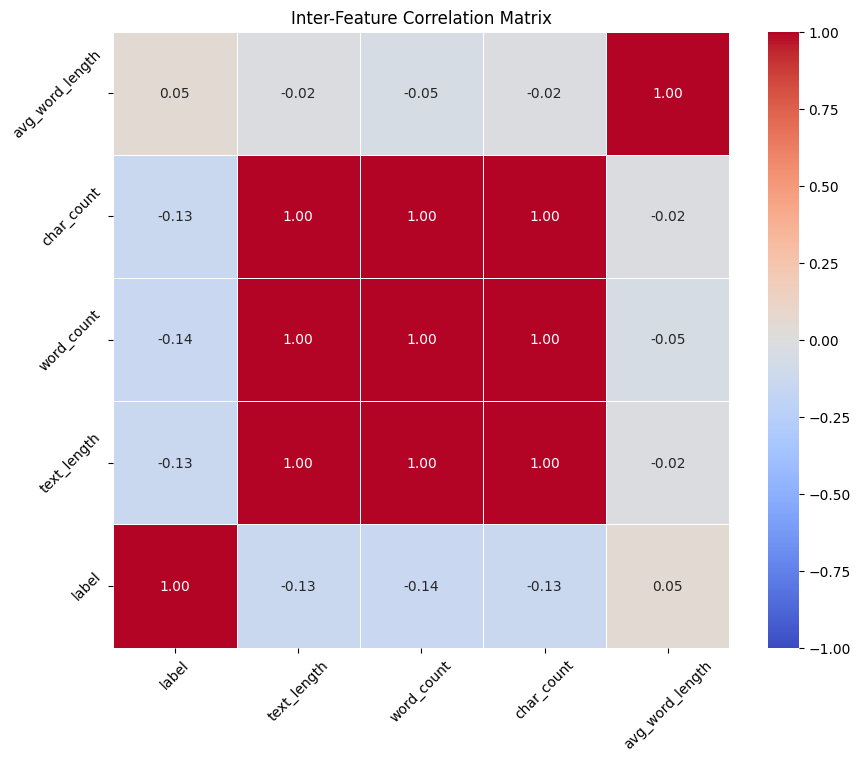

In [8]:
# Adding new features
train_df['word_count'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['char_count'] = train_df['text'].apply(len)
train_df['avg_word_length'] = train_df['char_count'] / (train_df['word_count'] + 1e-5) # We added 1e-5 to prevent section errors


# Let's select a dataframe containing only numeric columns
numeric_df = train_df[['label', 'text_length', 'word_count', 'char_count', 'avg_word_length']]

# Creating the correlation matrix and visualizing it with heatmap
correlation_matrix = numeric_df.corr()

# Arrange rows and columns in the same order
columns = ['label', 'text_length', 'word_count', 'char_count', 'avg_word_length']
correlation_matrix = correlation_matrix.reindex(columns, axis=0).reindex(columns, axis=1)

# We reverse the rows of the correlation matrix
correlation_matrix = correlation_matrix.iloc[::-1]

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    fmt=".2f",
    square=True,
    linewidths=0.5
)
plt.title("Inter-Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [96]:
!pip install tabulate

In [9]:
from tabulate import tabulate

def calculate_statistics(train_df):
    # 1. Overall text length and word count statistics
    text_length_stats = train_df['text_length'].describe()
    word_count_stats = train_df['word_count'].describe()

    # 2. Text length and word count statistics by star rating
    text_length_by_label = train_df.groupby('label')['text_length'].describe()
    word_count_by_label = train_df.groupby('label')['word_count'].describe()

    # 3. Format and print results
    print("Overall Text Length Statistics:")
    print(tabulate(text_length_stats.to_frame().T, headers="keys", tablefmt="fancy_grid"))

    print("\nOverall Word Count Statistics:")
    print(tabulate(word_count_stats.to_frame().T, headers="keys", tablefmt="fancy_grid"))

    print("\nText Length Statistics by Star Rating:")
    print(tabulate(text_length_by_label, headers="keys", tablefmt="fancy_grid"))

    print("\nWord Count Statistics by Star Rating:")
    print(tabulate(word_count_by_label, headers="keys", tablefmt="fancy_grid"))
    

calculate_statistics(train_df)

Overall Text Length Statistics:
╒═════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│             │   count │    mean │     std │   min │   25% │   50% │   75% │   max │
╞═════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ text_length │  130000 │ 731.948 │ 661.116 │     1 │   287 │   540 │   958 │  5637 │
╘═════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛

Overall Word Count Statistics:
╒════════════╤═════════╤═════════╤═════════╤═══════╤═══════╤═══════╤═══════╤═══════╕
│            │   count │    mean │     std │   min │   25% │   50% │   75% │   max │
╞════════════╪═════════╪═════════╪═════════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ word_count │  130000 │ 134.039 │ 120.936 │     1 │    53 │    99 │   176 │  1009 │
╘════════════╧═════════╧═════════╧═════════╧═══════╧═══════╧═══════╧═══════╧═══════╛

Text Length Statistics by Star Rating:
╒═════════╤═════════╤═════════╤═════════╤

### Insights from Text Length and Word Count Statistics

#### Negative Reviews:
- **Detailed Explanations**: Users tend to provide more detailed feedback in negative reviews, as seen in higher average text lengths and word counts for 1-star and 2-star ratings:
  - Average Characters: **827** (1-star), **817** (2-star)
  - Average Words: **151** (1-star), **152** (2-star)

#### Positive Reviews:
- **Concise Feedback**: Positive reviews (4-star and 5-star) are generally shorter and more concise:
  - Average Characters: **681** (4-star), **575** (5-star)
  - Average Words: **123** (4-star), **104** (5-star)

#### General Observations:
- **Wide Variation**: The text length and word count vary significantly:
  - Maximum Text Length: **5637 characters**
  - Maximum Word Count: **1009 words**
  - Indicates a need for preprocessing steps like normalization to handle variations effectively in modeling.

#### Star Ratings vs. Text Length:
- **Satisfaction in Fewer Words**: As star ratings increase, both average text lengths and word counts decrease. This suggests users express satisfaction more briefly compared to dissatisfaction.

#### Dataset Balance:
- **Equal Representation**: Each star rating category contains **26,000 reviews**, making the dataset well-balanced for comparative analysis across different ratings without requiring additional balancing.


C:\Users\Muhammed Ali Sezer\AppData\Local\Temp\ipykernel_7620\4236157678.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = train_df.groupby(['length_category_for_eda', 'label']).size().unstack(fill_value=0)


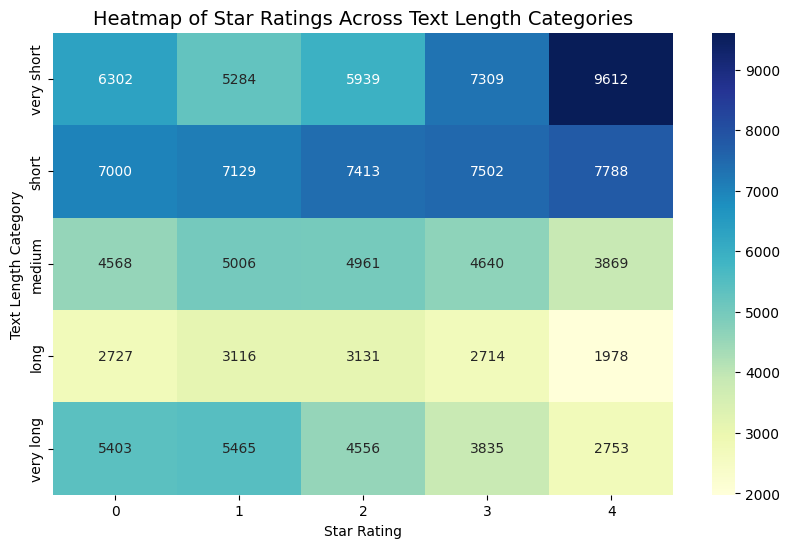

In [10]:
heatmap_data = train_df.groupby(['length_category_for_eda', 'label']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap of Star Ratings Across Text Length Categories", fontsize=14)
plt.xlabel("Star Rating")
plt.ylabel("Text Length Category")
plt.show()


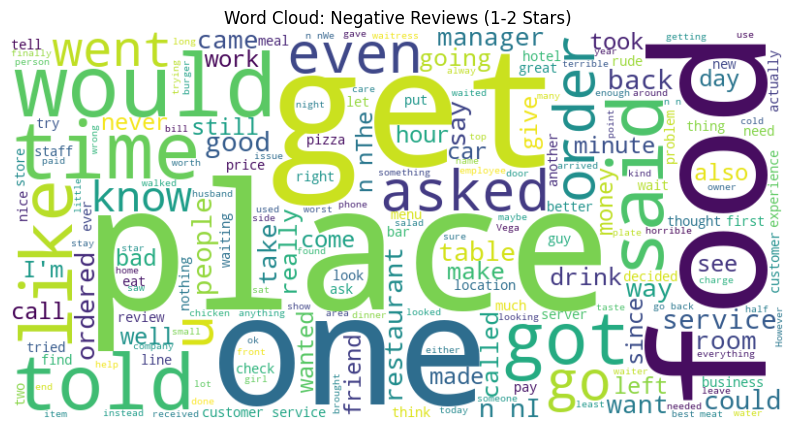

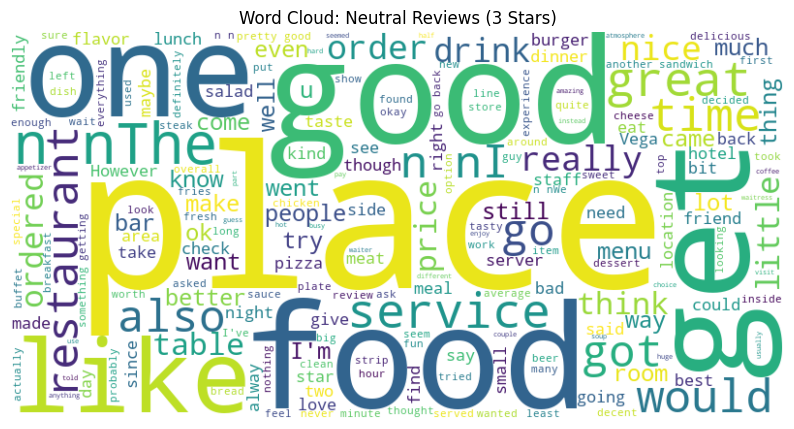

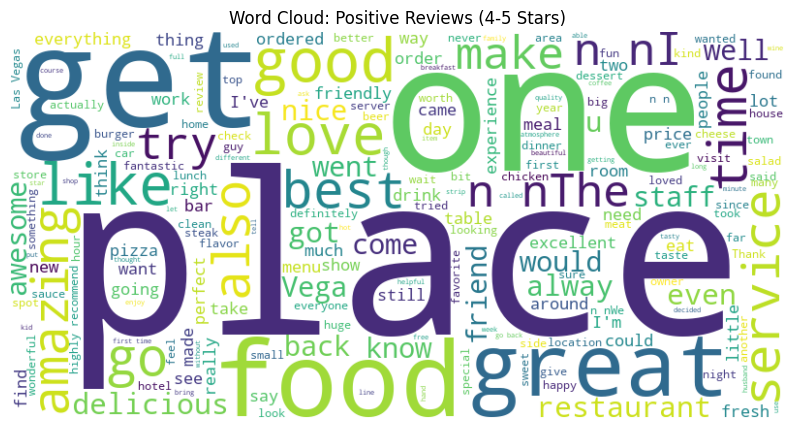

In [11]:
from wordcloud import WordCloud

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for label, sentiment in zip([0, 2, 4], ["Negative Reviews (1-2 Stars)", "Neutral Reviews (3 Stars)", "Positive Reviews (4-5 Stars)"]):
    category_text = " ".join(train_df[train_df['label'] == label]['text'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(category_text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud: {sentiment}")
    plt.axis("off")
    plt.show()


#2.2 - Exploratory Data Analysis Results
Steps Taken:

Text length categories ("very short," "short," "medium," "long," "very long") were defined and visualized.
The distribution of text lengths across star ratings was analyzed.
Correlation analysis was performed to examine the relationship between features like text length and word count with star ratings.
Word clouds were created for each sentiment category after removing stopwords.
Findings and Insights:

Negative reviews (1-2 stars) tend to have longer and more detailed text compared to positive reviews (4-5 stars), which are shorter and more concise.
Features like text length and word count are strong indicators of star ratings.
Correlation analysis revealed meaningful relationships between text characteristics and review sentiment.

## 2.3 - Data Preparation (25 points)

* Clean the comments. Remove irrelevant characters (e.g., URLs, mentions). Normalize the text (lowercasing, removing punctuation, etc.).
* Remove/unremove stopwords based on your assumption.
* Tokenize the comments.
* Lemmatize the comments.
* Vectorization.
* Word count analysis and outlier detection.

In [13]:
import pandas as pd
import re

# Function to clean text with relevant number filtering
def clean_text_with_relevant_numbers(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove numbers not in the context of "stars" or "out of"
    text = re.sub(r'\b\d+\b(?!\s*(stars|out of|rated|score))', '', text)  # Look-ahead for context control
    # Remove special characters, preserve numbers in meaningful context
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the revised cleaning function
train_df['clean_text'] = train_df['text'].apply(clean_text_with_relevant_numbers)
test_df['clean_text'] = test_df['text'].apply(clean_text_with_relevant_numbers)

# Remove rows with empty or meaningless clean_text
train_df = train_df[train_df['clean_text'].str.strip() != '']
test_df = test_df[test_df['clean_text'].str.strip() != '']

# Display the first few rows of cleaned text
print(train_df[['text', 'clean_text']].head())

# Verification: Check for irrelevant numbers
irrelevant_numbers_count = train_df['clean_text'].str.contains(r'\b\d+\b').sum()
print(f"Irrelevant numbers remaining in clean_text: {irrelevant_numbers_count}")  # Should focus only on meaningful numbers



                                                     text  \
312157  Alright, so I've been here twice.  The atmosph...   
626104  The hotel overall is not bad. One major issue ...   
170329  Been here about 15 years ago, when it was fair...   
131769  This place was, eh, okay...but I probably won'...   
517274  This review will take the form of a note to my...   

                                               clean_text  
312157  alright so ive been here twice the atmosphere ...  
626104  the hotel overall is not bad one major issue i...  
170329  been here about years ago when it was fairly n...  
131769  this place was eh okaybut i probably wont go b...  
517274  this review will take the form of a note to my...  
Irrelevant numbers remaining in clean_text: 6011


In [10]:
import nltk
nltk.download('all')  #Downloads all resources

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Muhammed Ali
[nltk_data]    |     Sezer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Muhammed Ali
[nltk_data]    |     Sezer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Muhammed Ali
[nltk_data]    |     Sezer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Muhammed Ali
[nltk_data]    |     Sezer\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package avera

True

In [14]:
pd.options.mode.copy_on_write = True 

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Stop words removal function
def enhanced_remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply stop words removal to enhanced_clean_text
train_df['no_stopwords_text'] = train_df['clean_text'].apply(enhanced_remove_stopwords)
test_df['no_stopwords_text'] = test_df['clean_text'].apply(enhanced_remove_stopwords)


In [15]:
# Function to tokenize text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the stop words removed text
train_df['tokens'] = train_df['no_stopwords_text'].apply(tokenize_text)
test_df['tokens'] = test_df['no_stopwords_text'].apply(tokenize_text)

# Display the first few rows of tokens
print(train_df[['no_stopwords_text', 'tokens']].head())


                                        no_stopwords_text  \
312157  alright ive twice atmosphere ok seating little...   
626104  hotel overall bad one major issue hotel doesnt...   
170329  years ago fairly new total shithole couldnt en...   
131769  place eh okaybut probably wont go back service...   
517274  review take form note reminding order find yes...   

                                                   tokens  
312157  [alright, ive, twice, atmosphere, ok, seating,...  
626104  [hotel, overall, bad, one, major, issue, hotel...  
170329  [years, ago, fairly, new, total, shithole, cou...  
131769  [place, eh, okaybut, probably, wont, go, back,...  
517274  [review, take, form, note, reminding, order, f...  


With default settings, WordNetLemmatizer treats all words as "nouns". However, for more accurate lemmatization of texts it is necessary to determine the grammatical types of words.
For this reason, we need to perform Lemmatization with POS (Part-of-Speech) Tagging.

In [16]:
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


# Map NLTK POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN

lemmatizer = WordNetLemmatizer()


# Function to lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in pos_tags]
    return lemmatized

# Apply the function to lemmatize tokens with POS tagging
train_df['lemmatized_tokens'] = train_df['tokens'].apply(lemmatize_with_pos)
test_df['lemmatized_tokens'] = test_df['tokens'].apply(lemmatize_with_pos)

# Display the first few rows of lemmatized tokens
print(train_df[['tokens', 'lemmatized_tokens']].head())



                                                   tokens  \
312157  [alright, ive, twice, atmosphere, ok, seating,...   
626104  [hotel, overall, bad, one, major, issue, hotel...   
170329  [years, ago, fairly, new, total, shithole, cou...   
131769  [place, eh, okaybut, probably, wont, go, back,...   
517274  [review, take, form, note, reminding, order, f...   

                                        lemmatized_tokens  
312157  [alright, ive, twice, atmosphere, ok, seat, li...  
626104  [hotel, overall, bad, one, major, issue, hotel...  
170329  [year, ago, fairly, new, total, shithole, coul...  
131769  [place, eh, okaybut, probably, wont, go, back,...  
517274  [review, take, form, note, remind, order, find...  


In [20]:
## WE TESTED LEMMATIZATION ON RANDOM SAMPLES

# Let's make a comparison by choosing a few random examples
sample_indices = train_df.sample(5).index
sample_comparison = train_df.loc[sample_indices, ['tokens', 'lemmatized_tokens']]

# Print comparison
print(sample_comparison)


                                                   tokens  \
139539  [horrible, service, period, watched, customers...   
435896  [absolutely, gorgeous, hotel, however, taking,...   
472303  [careful, purchasing, dairy, products, people,...   
63225   [terms, bad, experience, ichiza, havent, reall...   
21435   [sunday, brunch, perfect, cold, buffet, warm, ...   

                                        lemmatized_tokens  
139539  [horrible, service, period, watch, customer, h...  
435896  [absolutely, gorgeous, hotel, however, take, o...  
472303  [careful, purchase, dairy, product, people, re...  
63225   [term, bad, experience, ichiza, havent, really...  
21435   [sunday, brunch, perfect, cold, buffet, warm, ...  


In [18]:
##WE DID A FREQUENCY ANALYSIS TO SEE IF LEMMATIZATION WORKS CORRECTLY.
from collections import Counter

# Analyze the overall distribution of lemmatized words
lemmatized_words = [word for tokens in train_df['lemmatized_tokens'] for word in tokens]
lemmatized_word_freq = Counter(lemmatized_words).most_common(10)

print("Most common lemmatized words:")
print(lemmatized_word_freq)


Most common lemmatized words:
[('get', 98831), ('go', 90913), ('good', 83749), ('place', 83482), ('food', 77576), ('like', 67384), ('time', 61244), ('one', 56065), ('come', 54576), ('order', 52704)]


In [21]:
#1. Vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # We vectorize the first 1000 words

# Fit and transform the lemmatized tokens into a vectorized matrix
lemmatized_text = train_df['lemmatized_tokens'].apply(lambda tokens: ' '.join(tokens))
vectorized_matrix = vectorizer.fit_transform(lemmatized_text)

# Display the shape of the matrix
print(f"Vectorized Matrix Shape: {vectorized_matrix.shape}")

# Display the first 5 feature names
print("Feature Names:", vectorizer.get_feature_names_out()[:5])


Vectorized Matrix Shape: (129990, 1000)
Feature Names: ['able' 'absolutely' 'accommodate' 'across' 'act']


In [22]:
sparsity = 1.0 - (vectorized_matrix.count_nonzero() / (vectorized_matrix.shape[0] * vectorized_matrix.shape[1]))
print(f"Sparsity: {sparsity:.2%}")


Sparsity: 96.14%


In [23]:
# 2. Word Count Analysis
# Add word count column to the dataframe
train_df['word_count'] = train_df['lemmatized_tokens'].apply(len)

# Describe the word count statistics
word_count_stats = train_df['word_count'].describe()
print("Word Count Statistics:")
print(word_count_stats)


Word Count Statistics:
count    129990.000000
mean         68.179421
std          60.565009
min           0.000000
25%          27.000000
50%          50.000000
75%          89.000000
max         823.000000
Name: word_count, dtype: float64


The wide distribution of word numbers (min 0 - max 823) shows that there are both very short and very long comments in the data set.
This indicates that outliers should be taken into account during the modeling phase.

Outlier limits: Lower bound = -66.0, Upper limit = 182.0
Cleaned training dataset size: (123089, 13)
Cleaned test dataset size: (9512, 10)


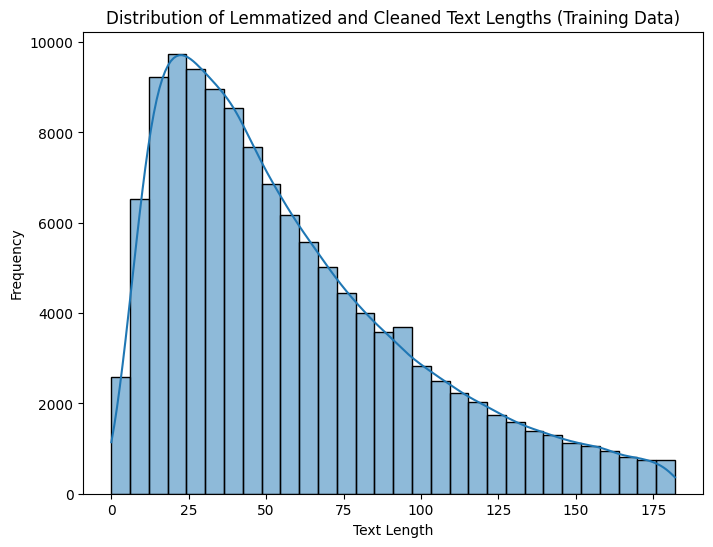

In [24]:
# Calculate lemmatized text lengths
train_df['lemmatized_review_length'] = train_df['lemmatized_tokens'].apply(len)
test_df['lemmatized_review_length'] = test_df['lemmatized_tokens'].apply(len)

# IQR calculation
Q1 = train_df['lemmatized_review_length'].quantile(0.25)
Q3 = train_df['lemmatized_review_length'].quantile(0.75)
IQR = Q3 - Q1

# Lower and upper limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier limits: Lower bound = {lower_bound}, Upper limit = {upper_bound}")

# Cleaning outliers
filtered_train_df = train_df[(train_df['lemmatized_review_length'] >= lower_bound) & 
                             (train_df['lemmatized_review_length'] <= upper_bound)]

filtered_test_df = test_df[(test_df['lemmatized_review_length'] >= lower_bound) & 
                           (test_df['lemmatized_review_length'] <= upper_bound)]

# Sizes of cleaned datasets
print(f"Cleaned training dataset size: {filtered_train_df.shape}")
print(f"Cleaned test dataset size: {filtered_test_df.shape}")

# New histogram (for cleaned dataset)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(filtered_train_df['lemmatized_review_length'], bins=30, kde=True, edgecolor='black')
plt.title('Distribution of Lemmatized and Cleaned Text Lengths (Training Data)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()




#2.3 - Data Preparation Results
Steps Taken:

Raw text was cleaned by removing unnecessary elements such as URLs, mentions, special characters, and extra spaces.
Text was converted to lowercase for consistency.
Stopwords were removed to focus on meaningful words.
Words were lemmatized to reduce them to their root forms for better analysis.
The cleaned text was tokenized into individual words for further processing.
Findings and Insights:

The cleaning process significantly reduced the size and complexity of the text, making it easier to work with.
Stopword removal highlighted the core words in the reviews, which are expected to contribute more to sentiment prediction.
Lemmatization ensured that words with similar meanings (e.g., "running," "runs") are treated uniformly, reducing redundancy in the dataset.

## 2.4 - TF(Term Frequency) - IDF(Inverse Document Frequency) (15 points)

* Explain TF & IDF.
* Apply TF & IDF methods.

### 2.4 - TF-IDF (Term Frequency-Inverse Document Frequency)
TF-IDF is a technique to quantify the importance of words in a document relative to a collection of documents (corpus). It combines:
- **Term Frequency (TF):** How often a word appears in a specific document.
- **Inverse Document Frequency (IDF):** How rare the word is across the entire corpus.
The result helps emphasize important words while downweighting common words.


Training TF-IDF size: (123089, 1000)
Test TF-IDF size: (9512, 1000)


C:\Users\Muhammed Ali Sezer\AppData\Local\Temp\ipykernel_7620\2218371088.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tfidf_weight', y='word', data=top_words, palette='viridis')


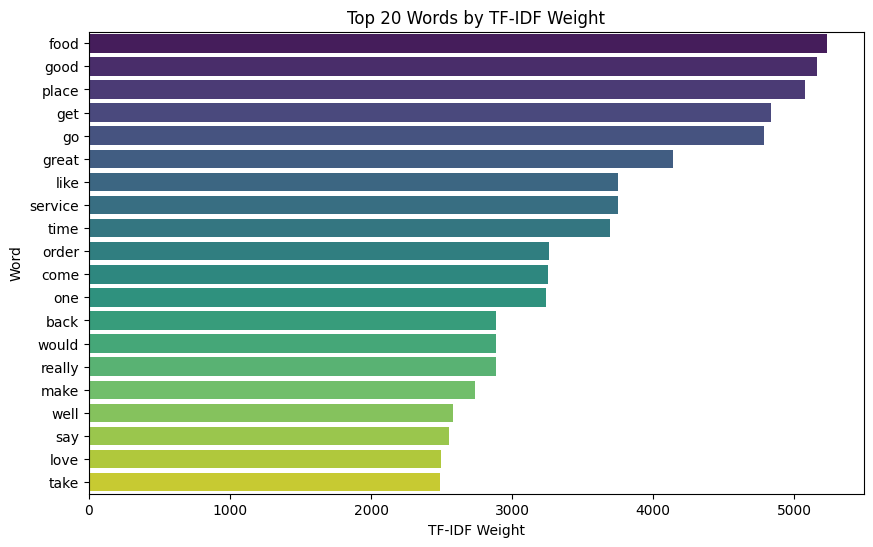

In [30]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Vector will be created for the first 1000 words

# Vectorize the training set
train_tfidf = tfidf_vectorizer.fit_transform(filtered_train_df['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

# Vectorize the test set
test_tfidf = tfidf_vectorizer.transform(filtered_test_df['lemmatized_tokens'].apply(lambda x: ' '.join(x)))

# Check sizes of TF-IDF vectors
print(f"Training TF-IDF size: {train_tfidf.shape}")
print(f"Test TF-IDF size: {test_tfidf.shape}")


# Calculate total TF-IDF weights of words
tfidf_weights = np.asarray(train_tfidf.sum(axis=0)).flatten()
features = tfidf_vectorizer.get_feature_names_out()
tfidf_weights_df = pd.DataFrame({'word': features, 'tfidf_weight': tfidf_weights})



# Visualize words with highest TF-IDF weight
top_words = tfidf_weights_df.sort_values(by='tfidf_weight', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='tfidf_weight', y='word', data=top_words, palette='viridis')
plt.title("Top 20 Words by TF-IDF Weight")
plt.xlabel("TF-IDF Weight")
plt.ylabel("Word")
plt.show()



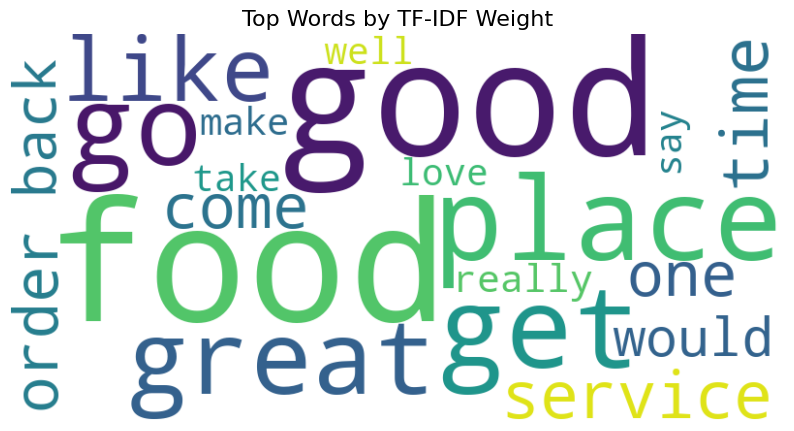

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(
    dict(zip(top_words['word'], top_words['tfidf_weight']))
)

# Show word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Words by TF-IDF Weight", fontsize=16)
plt.show()


### 2.4 - TF-IDF Results
- **Steps Taken:**
  - Computed TF-IDF values for the cleaned text.
  - Limited to the top 1000 features to reduce dimensionality.
  - Analyzed and visualized the most important words based on average TF-IDF scores.

- **Findings and Insights:**
  - The top TF-IDF words highlight key terms in the dataset, which are likely to contribute to sentiment prediction.
  - Words with high TF-IDF scores are unique and provide valuable information.


# 3 - Training Deep Learning Models (30 Points)

* Import relevant libraries.
* Explain the differences between Neural Networks (NN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN).

In [ ]:
from keras.models import Sequential
from keras.layers import Conv1D, GlobalMaxPooling1D, Flatten
from keras.layers import Dense, Input, Embedding, Dropout, Activation

In [29]:
pip install tensorflow


  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl.metadata (3.3 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
# Deep Learning with TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D, Dropout, Flatten

# NumPy and pandas for data processing
import numpy as np
import pandas as pd

# sklearn for training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Visualization
import matplotlib.pyplot as plt

# For randomness
import random

print("Libraries successfully imported!")



Libraries successfully imported!


# Differences Between Neural Networks (NN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN)

Neural Networks (NN), Convolutional Neural Networks (CNN), and Recurrent Neural Networks (RNN) are all types of artificial neural networks used in machine learning and deep learning. Each type has its own structure and is suited for specific tasks.

---

## **1. Neural Networks (NN)**
Neural Networks, also known as Feedforward Neural Networks, are the most basic type of artificial neural networks. They are composed of:
- **Input layer**: Accepts input features.
- **Hidden layers**: Perform computations using weights and biases.
- **Output layer**: Produces the final prediction or classification.

### **Key Characteristics**:
- Fully connected layers: Each neuron is connected to every neuron in the subsequent layer.
- Suitable for structured data (e.g., tabular data) and basic machine learning tasks.
- Doesn't consider spatial or temporal relationships in data.

### **Use Cases**:
- Regression tasks.
- Classification tasks for structured data.
- Predictive modeling in general.

---

## **2. Convolutional Neural Networks (CNN)**
Convolutional Neural Networks are specialized for processing grid-like data such as images. They use:
- **Convolutional layers**: Extract spatial features from the data using filters.
- **Pooling layers**: Reduce the dimensionality of the data while preserving important features.
- **Fully connected layers**: Generate the final output.

### **Key Characteristics**:
- Recognizes spatial patterns (e.g., edges, textures) in images or videos.
- Parameter sharing (filters) makes them computationally efficient.
- Captures hierarchical features, starting from low-level (edges) to high-level (objects).

### **Use Cases**:
- Image classification (e.g., identifying objects in pictures).
- Object detection and localization.
- Medical imaging, facial recognition, and computer vision tasks.

---

## **3. Recurrent Neural Networks (RNN)**
Recurrent Neural Networks are designed to handle sequential data. They use:
- **Recurrent layers**: Share parameters across time steps and use feedback connections to process temporal sequences.
- **Memory mechanisms**: Allow the network to "remember" previous inputs.

### **Key Characteristics**:
- Processes sequences of data where order matters (e.g., time-series, language).
- Maintains a "hidden state" that captures information from previous time steps.
- Can suffer from vanishing gradients for long sequences (addressed by LSTMs/GRUs).

### **Use Cases**:
- Natural language processing (NLP) tasks (e.g., sentiment analysis, text generation).
- Time-series prediction (e.g., stock prices, weather forecasts).
- Speech recognition and audio processing.

---

## **Summary Table**

| Feature              | Neural Networks (NN)     | Convolutional Neural Networks (CNN) | Recurrent Neural Networks (RNN) |
|-----------------------|--------------------------|--------------------------------------|----------------------------------|
| **Input Type**        | Structured data          | Images, videos, spatial data         | Sequential or time-series data   |
| **Architecture**      | Fully connected layers   | Convolutional and pooling layers     | Recurrent layers with feedback   |
| **Key Focus**         | General-purpose tasks    | Spatial relationships                | Temporal relationships           |
| **Use Cases**         | Regression, classification | Image recognition, object detection | NLP, time-series, speech         |
| **Advantages**        | Simplicity, general use  | Spatial feature extraction           | Sequence processing and memory   |

---

Neural Networks provide the foundation, while CNNs and RNNs are specialized extensions for spatial and temporal data, respectively. Understanding their differences helps choose the right model for a given problem.


## 3.1 - Training NN Model

* Construct models starting from a simple neural network (NN) with a single layer, and incrementally add layers to build more complex architectures. Analyze the performance differences among them.
* Experiment with different activation functions, optimizers, and regularization techniques (such as dropout rates). For each trial, document the effects of these changes. For example, observe how adding or removing layers, changing activation functions, or adjusting dropout rates impacts performance.
* Tune hyperparameters like learning rate, number of layers, and dropout percentage. Explain how each adjustment affects overfitting, underfitting, and generalization on the test data.

# Defining the Results Table and Logging Functions

 This section is responsible for storing and analyzing the results of each model experiment.
 - `results_df`: A pandas DataFrame that records the configuration and performance metrics of each model experiment.
 - `log_results`: A function that adds the model's name, layer configuration, activation functions, optimizer,
   learning rate, dropout rate, epoch count, and accuracy metrics (training, validation, and test) to the table.
 - `evaluate_and_log_model`: After training the model, this function evaluates its performance and logs the results 
   using `log_results`. The metrics include training accuracy, validation accuracy, and test accuracy.

 The results table enables us to systematically compare and analyze all experiments in an organized way.


In [33]:
import pandas as pd

# Global results table
results_df = pd.DataFrame(columns=['Model', 'Layers', 'Activation', 'Optimizer', 'Learning Rate',
                                   'Dropout', 'Epochs', 'Train Accuracy', 'Val Accuracy', 'Test Accuracy'])

# Results logging function
def log_results(model_name, layers, activation, optimizer, learning_rate, dropout, epochs, train_acc, val_acc, test_acc):
    global results_df
    new_row = pd.DataFrame([{
        'Model': model_name,
        'Layers': layers,
        'Activation': activation,
        'Optimizer': optimizer,
        'Learning Rate': learning_rate,
        'Dropout': dropout,
        'Epochs': epochs,
        'Train Accuracy': train_acc,
        'Val Accuracy': val_acc,
        'Test Accuracy': test_acc
    }])
    # Check for empty or all NaN values ​​in new line
    if not new_row.isnull().all(axis=1).any():
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Performance evaluation and logging function
def evaluate_and_log_model(model, history, model_name, layers, activation, optimizer, learning_rate, dropout, epochs):
    """
    Evaluate the model and log its performance into the results DataFrame.
    """
# Training and validation accuracies
    train_acc = max(history.history['accuracy'])
    val_acc = max(history.history['val_accuracy'])

# Test accuracy
    y_pred_probs = model.predict(test_tfidf)
    y_pred = y_pred_probs.argmax(axis=1)  # Select the highest probability class
    test_acc = accuracy_score(filtered_test_df['label'], y_pred)

# Log results
    log_results(model_name, layers, activation, optimizer, learning_rate, dropout, epochs, train_acc, val_acc, test_acc)


# Visualize training and validation accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Model Accuracy Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Model Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1871
           1       0.45      0.50      0.47      1880
           2       0.47      0.41      0.43      1903
           3       0.44      0.45      0.45      1903
           4       0.63      0.62      0.63      1955

    accuracy                           0.53      9512
   macro avg       0.53      0.53      0.53      9512
weighted avg       0.53      0.53      0.53      9512

Test Accuracy: 0.53
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


C:\Users\Muhammed Ali Sezer\AppData\Local\Temp\ipykernel_7620\3622268244.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, new_row], ignore_index=True)


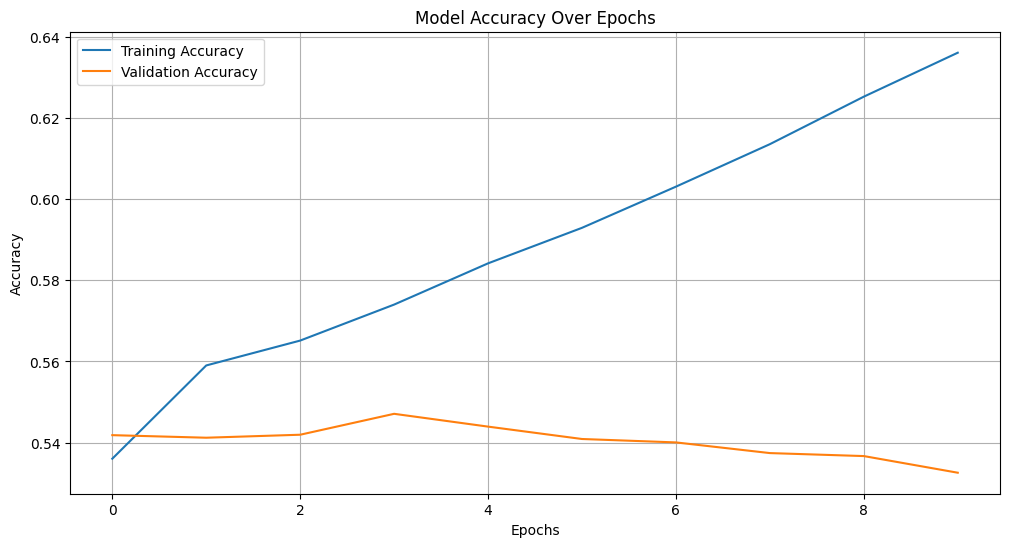

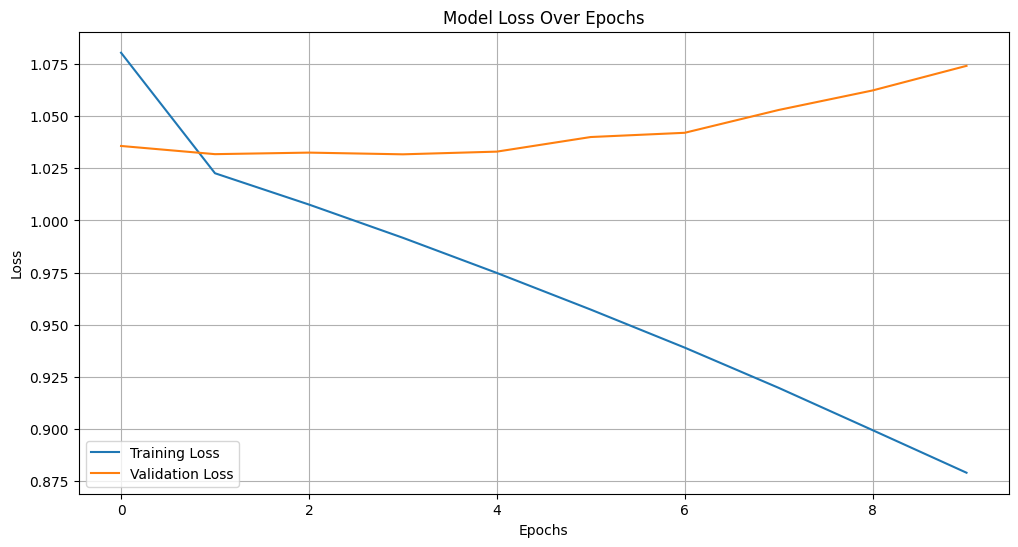

In [34]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Encode labels one-hot for multi-class classification
train_labels = to_categorical(filtered_train_df['label'], num_classes=5)
test_labels = to_categorical(filtered_test_df['label'], num_classes=5)

# Multi-class model definition
def create_multiclass_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax') # Softmax for multi-class output
    ])
    return model

# Creating the model
input_dim = train_tfidf.shape[1]
model = create_multiclass_nn(input_dim, num_classes=5)

# Compiling the model
learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Training of the model
epochs = 10
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

# Predictions on test data set
y_pred_probs = model.predict(test_tfidf)
y_pred = y_pred_probs.argmax(axis=1)

# Performance metrics
print("Classification Report:")
print(classification_report(filtered_test_df['label'], y_pred))

# Calculate test accuracy
test_accuracy = accuracy_score(filtered_test_df['label'], y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Logging of performance
evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Multiclass NN",
    layers="Dense(64)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="None",
    epochs=epochs
)

import matplotlib.pyplot as plt

plot_training_history(history)



C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


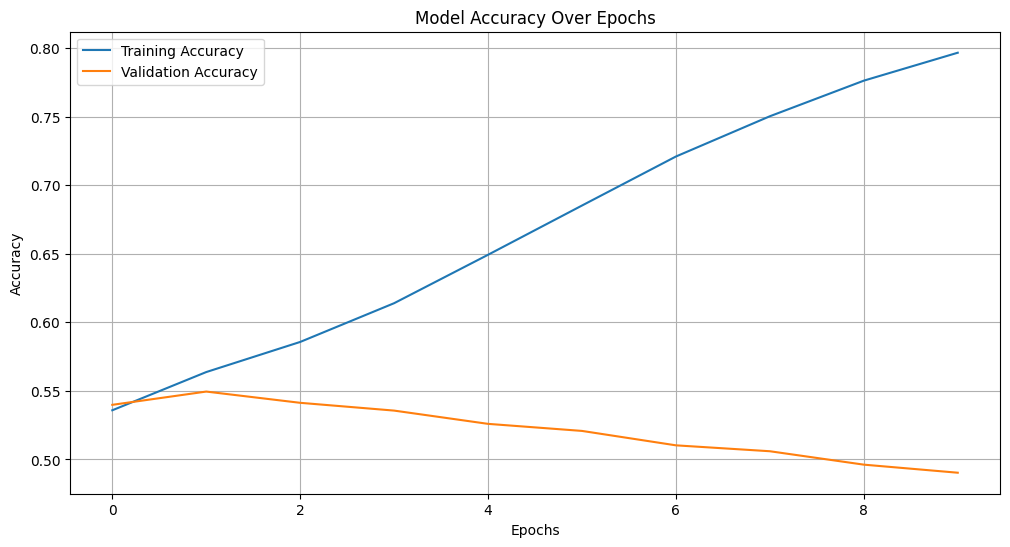

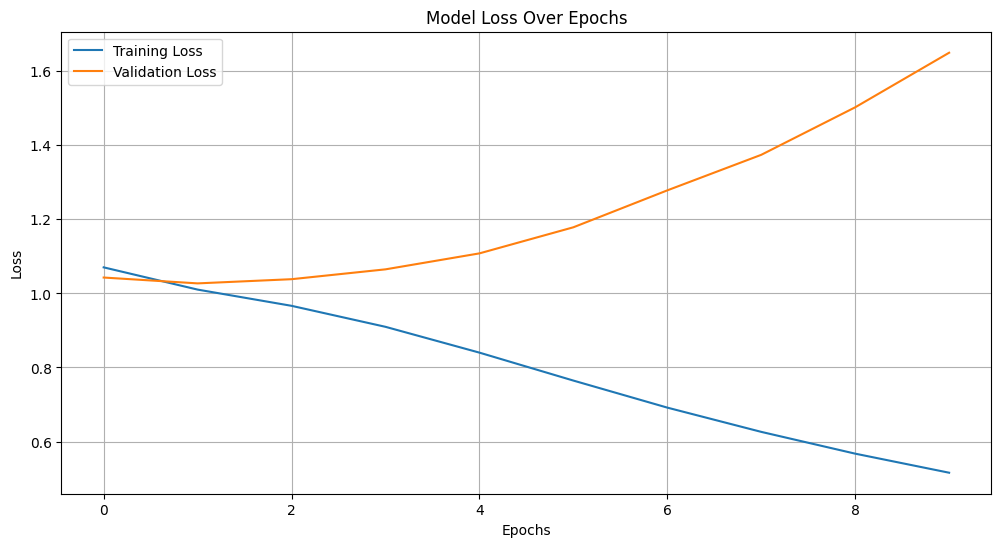

In [35]:
def create_two_layer_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_two_layer_nn(input_dim=train_tfidf.shape[1], num_classes=5)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Two Layer NN",
    layers="Dense(128)-Dense(64)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="None",
    epochs=epochs
)

plot_training_history(history)



C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


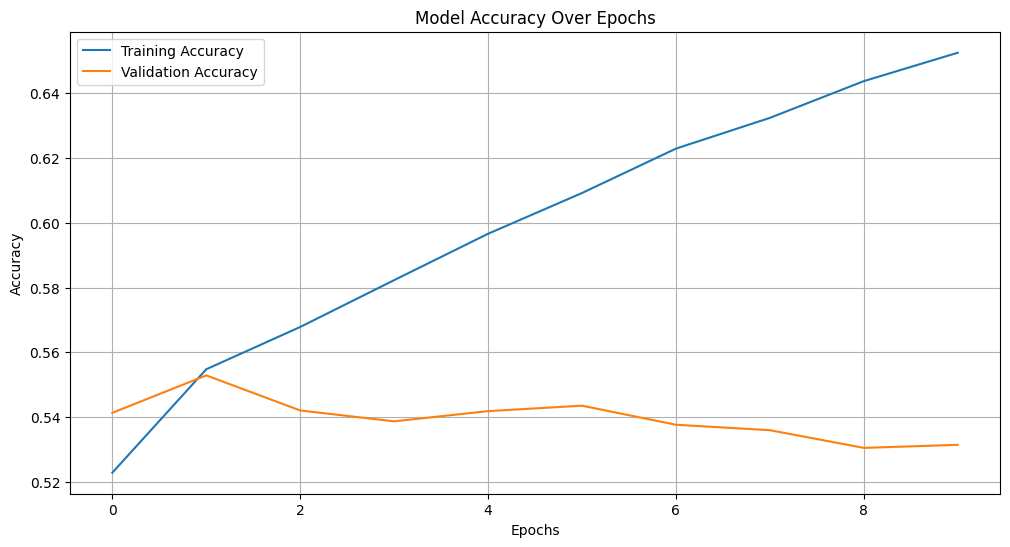

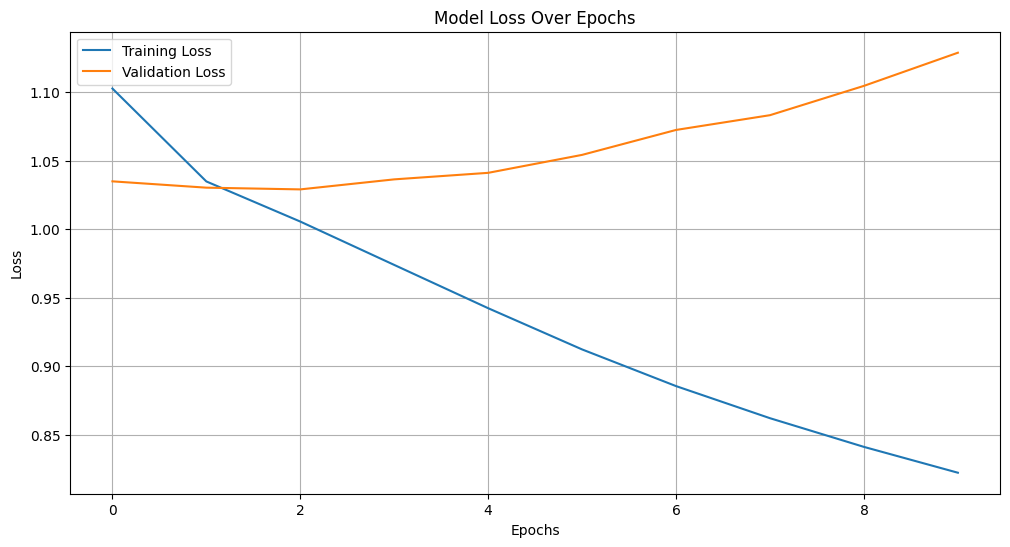

In [36]:
from tensorflow.keras.layers import Dropout

def create_dropout_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),  
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_dropout_nn(input_dim=train_tfidf.shape[1], num_classes=5)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Dropout NN",
    layers="Dense(128)-Dropout(0.3)-Dense(64)-Dropout(0.3)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="0.3",
    epochs=epochs
)

plot_training_history(history)


C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


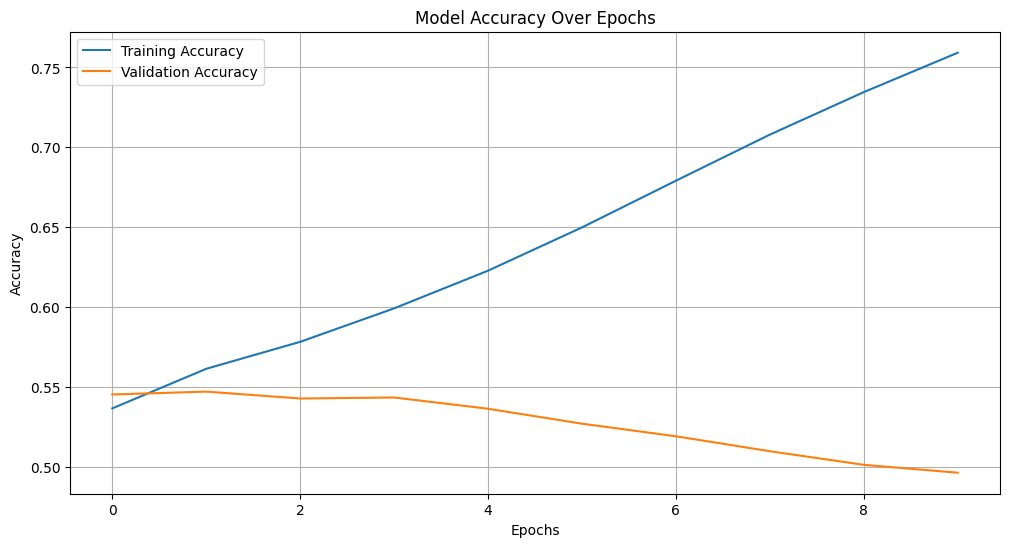

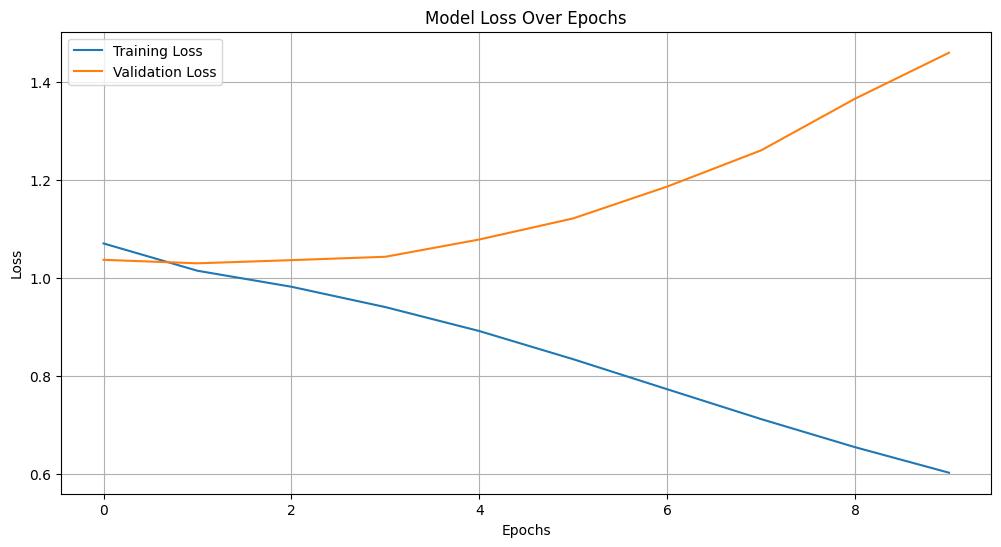

In [37]:
from tensorflow.keras.layers import LeakyReLU

def create_leaky_relu_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(128),
        LeakyReLU(alpha=0.1),  
        Dense(64),
        LeakyReLU(alpha=0.1),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_leaky_relu_nn(input_dim=train_tfidf.shape[1], num_classes=5)

learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Leaky ReLU NN",
    layers="Dense(128)-LeakyReLU-Dense(64)-LeakyReLU-Dense(5)",
    activation="LeakyReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="None",
    epochs=epochs
)

plot_training_history(history)


C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


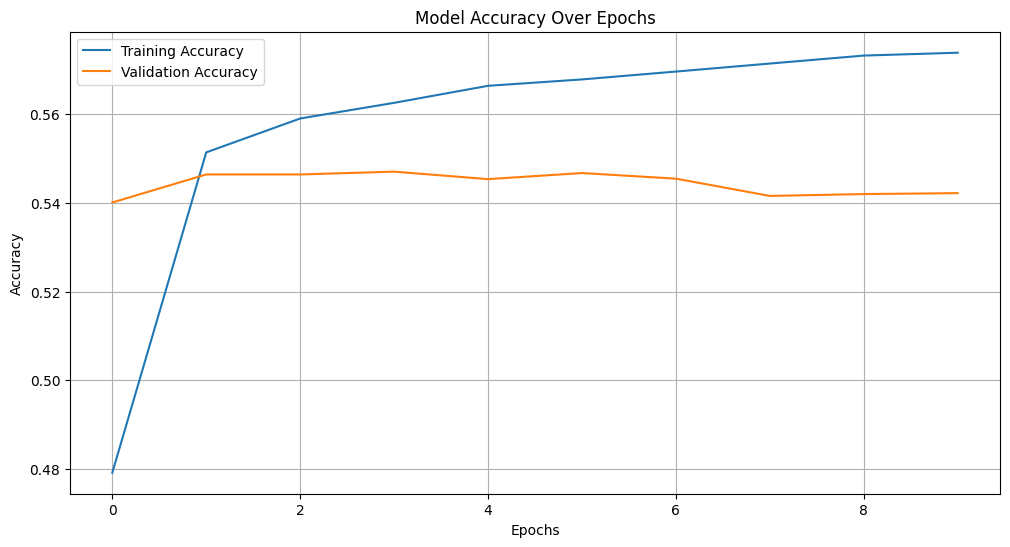

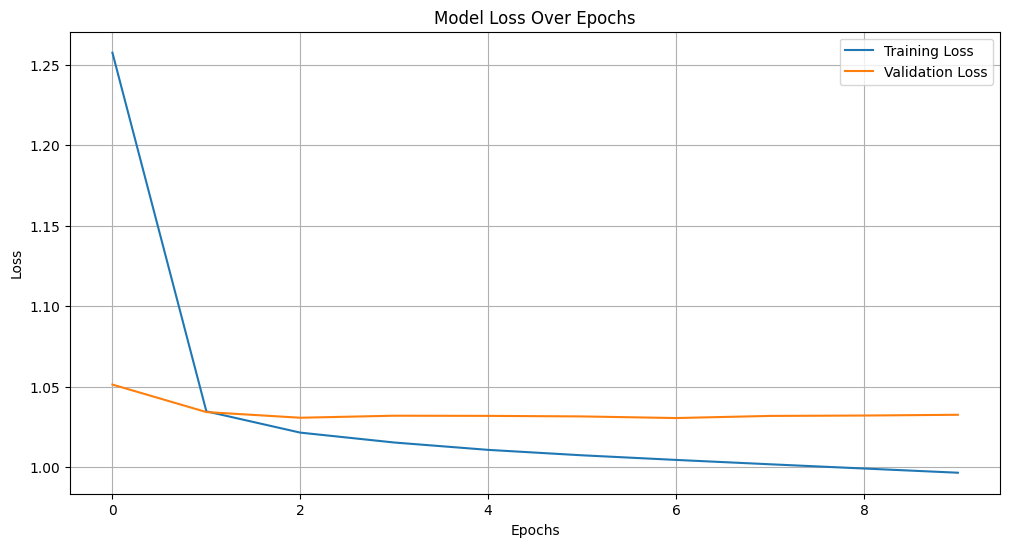

In [38]:
learning_rate = 0.0001  
batch_size = 64         

model = create_two_layer_nn(input_dim=train_tfidf.shape[1], num_classes=5)

model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
epochs = 10
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Hyperparameter Tuned NN",
    layers="Dense(128)-Dense(64)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="None",
    epochs=epochs
)

plot_training_history(history)



C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


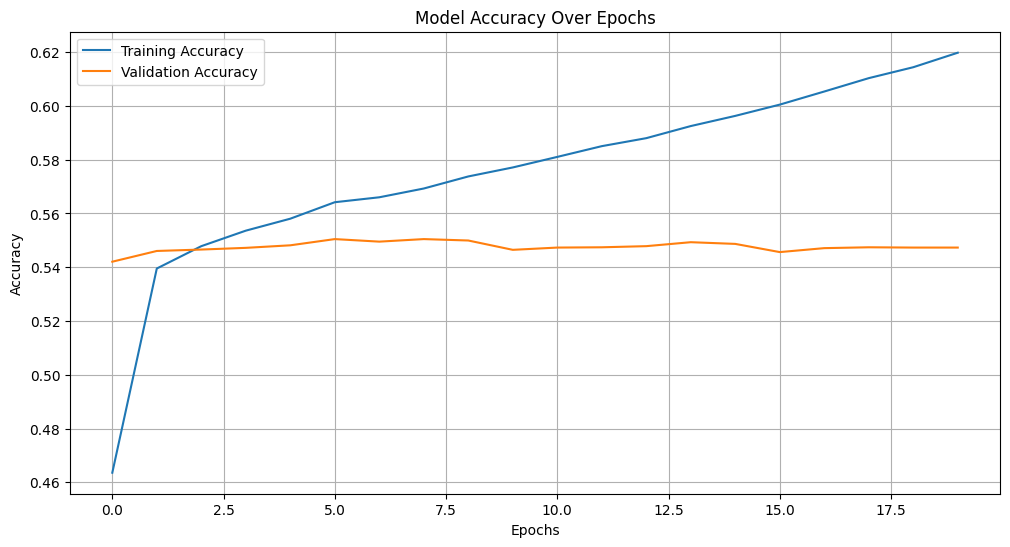

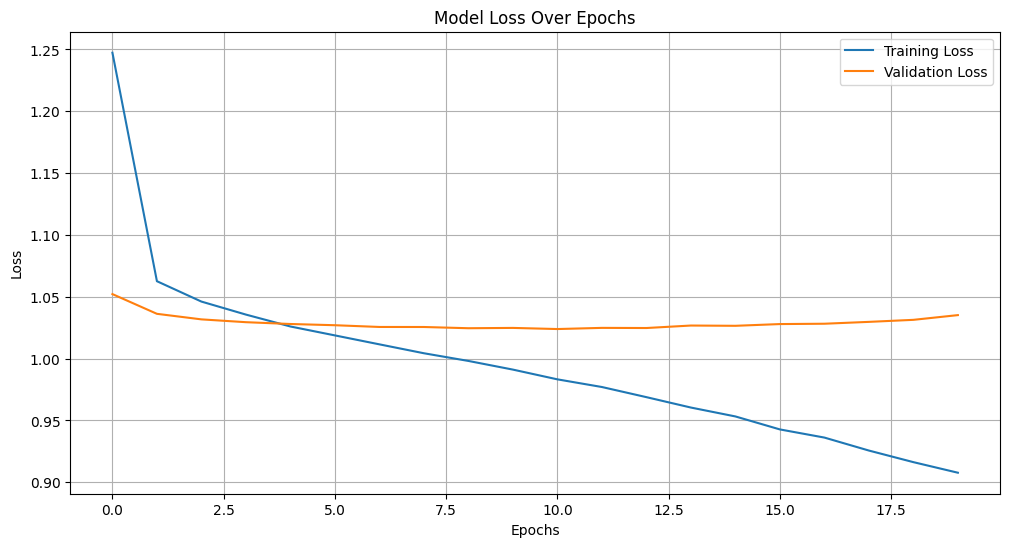

In [39]:
def create_optimized_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),  
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_optimized_nn(input_dim=train_tfidf.shape[1], num_classes=5)


learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20  
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Optimized NN",
    layers="Dense(128)-Dropout(0.2)-Dense(64)-Dropout(0.2)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="0.2",
    epochs=epochs
)

plot_training_history(history)


C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


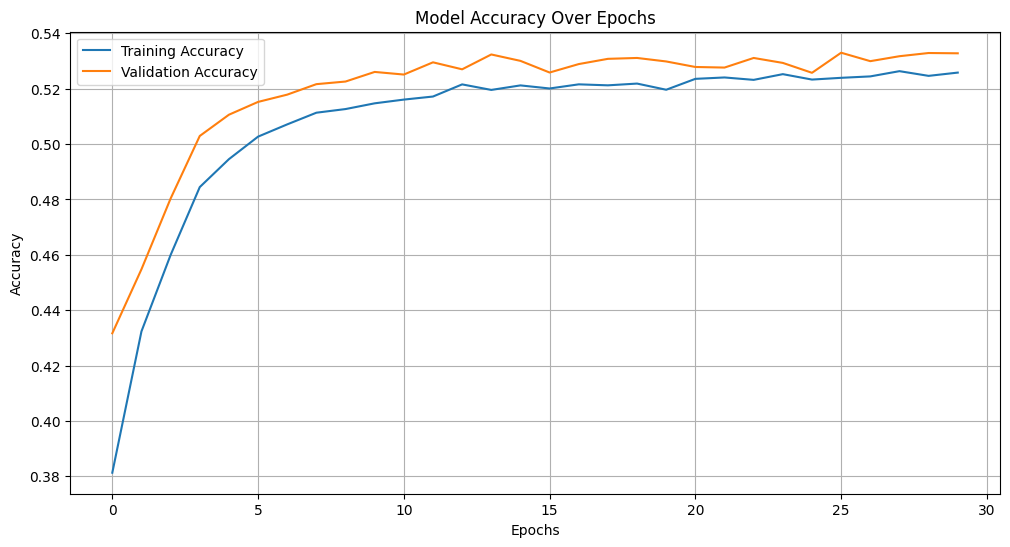

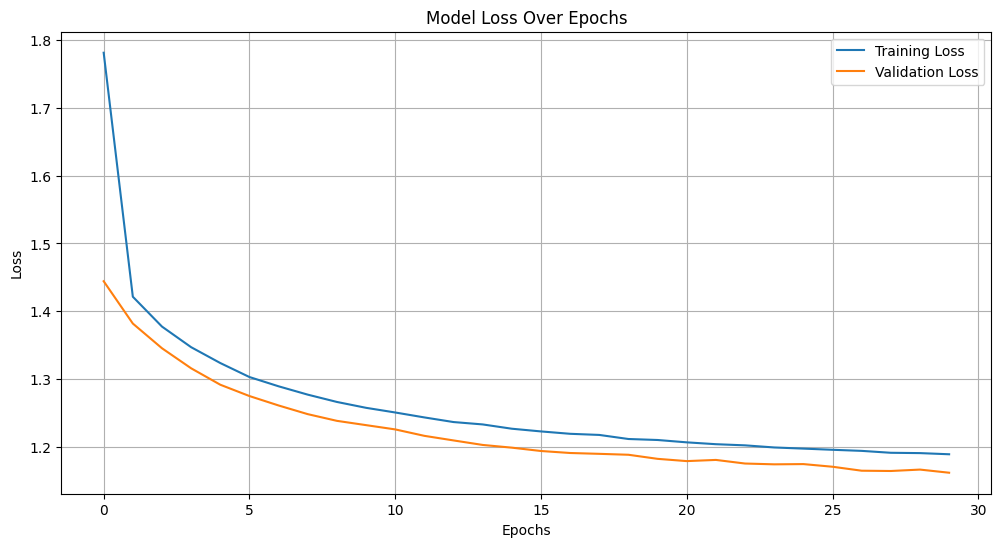

In [41]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import RMSprop

def create_advanced_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim, kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_advanced_nn(input_dim=train_tfidf.shape[1], num_classes=5)

learning_rate = 0.0001
optimizer = RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 30
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="Advanced NN",
    layers="Dense(128)-Dropout(0.3)-Dense(64)-Dropout(0.3)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="RMSprop",
    learning_rate=learning_rate,
    dropout="0.3",
    epochs=epochs
)

plot_training_history(history)



C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


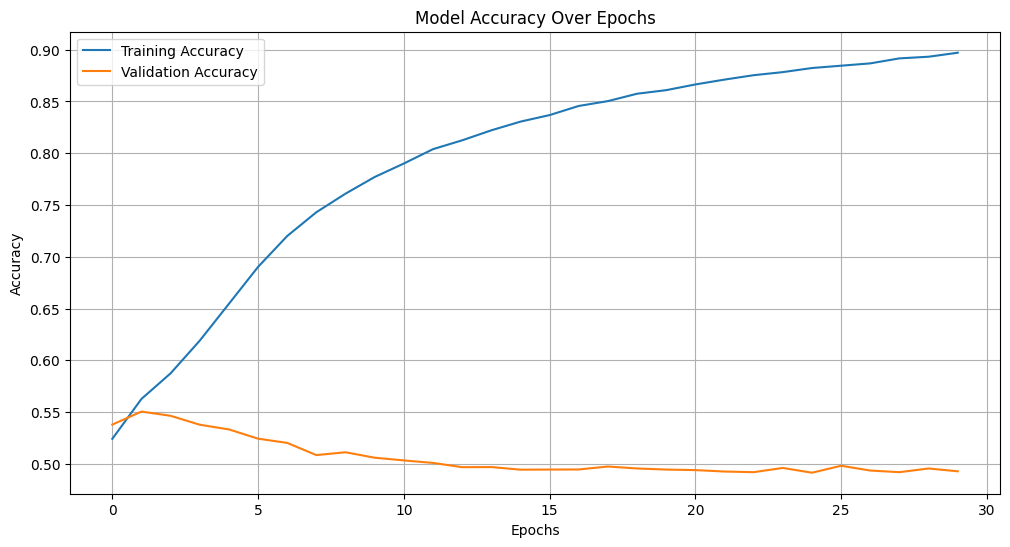

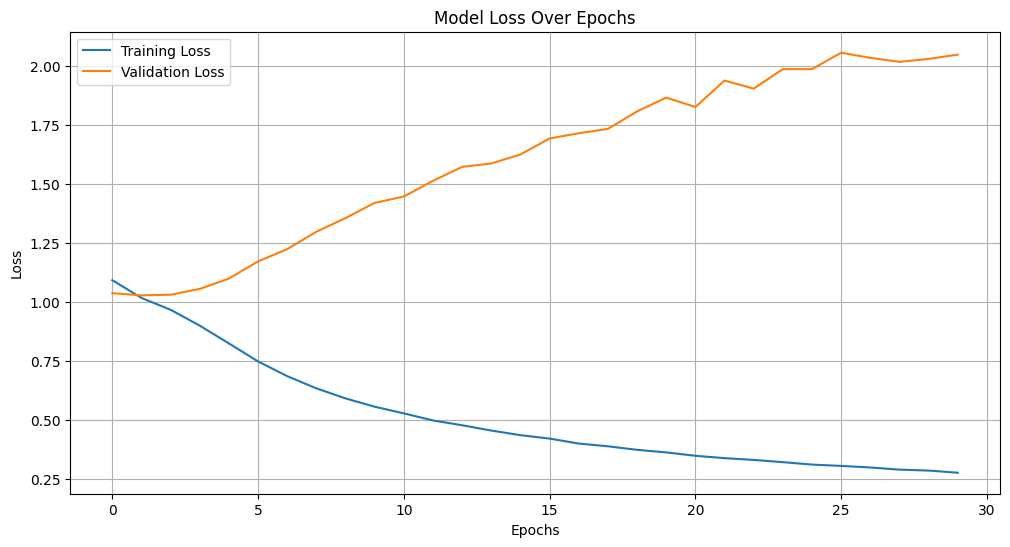

In [44]:
def create_high_capacity_nn(input_dim, num_classes=5):
    model = Sequential([
        Dense(256, activation='relu', input_dim=input_dim),
        Dropout(0.2),  
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = create_high_capacity_nn(input_dim=train_tfidf.shape[1], num_classes=5)

# Modeli derle
learning_rate = 0.0005  
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğit
epochs = 30
history = model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=model,
    history=history,
    model_name="High Capacity NN",
    layers="Dense(256)-Dropout(0.2)-Dense(128)-Dropout(0.2)-Dense(64)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="0.2",
    epochs=epochs
)

plot_training_history(history)


C:\Users\Muhammed Ali Sezer\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


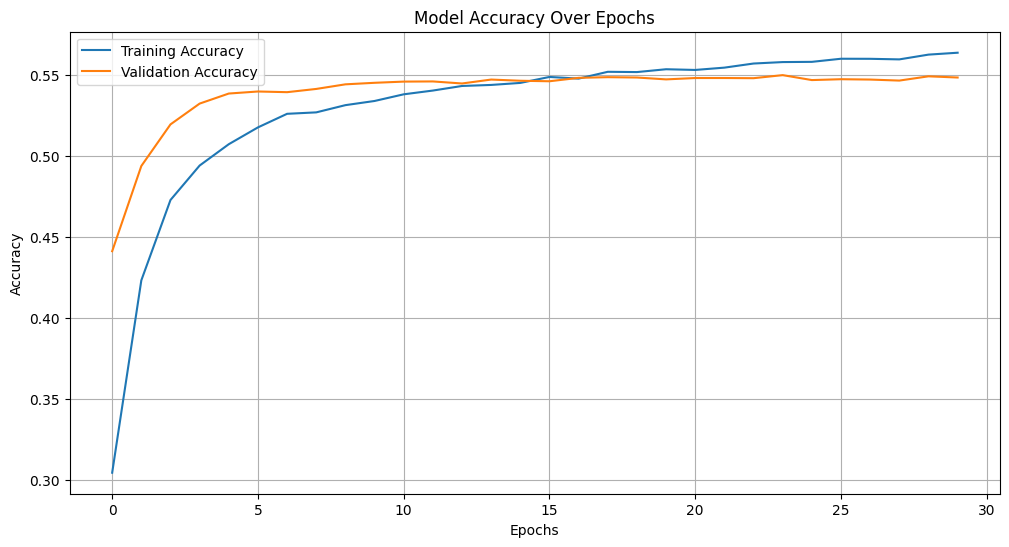

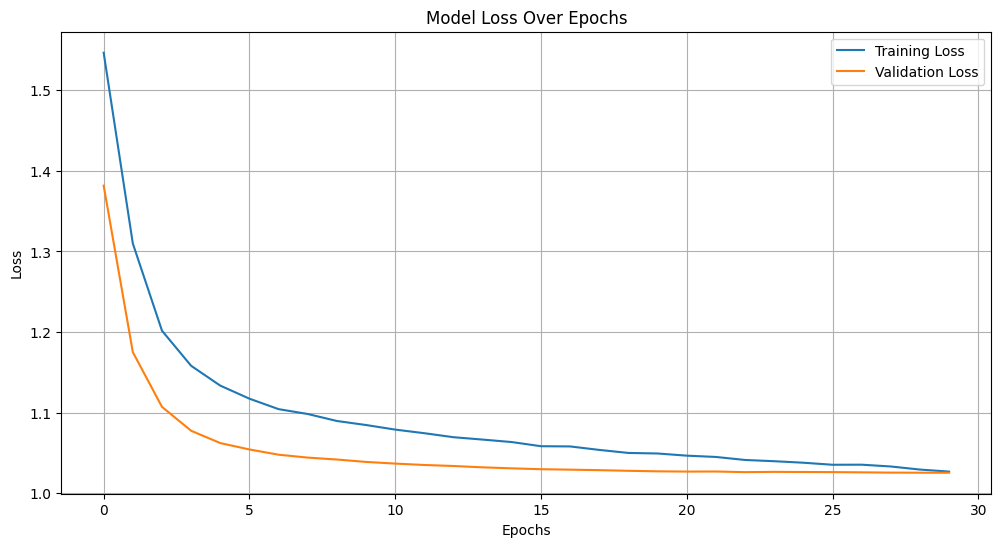

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def create_revised_model(input_dim, num_classes=5):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim), 
        Dropout(0.4),  
        Dense(32, activation='relu'),  
        Dropout(0.4),  
        Dense(num_classes, activation='softmax')  
    ])
    return model

revised_model = create_revised_model(input_dim=train_tfidf.shape[1], num_classes=5)

learning_rate = 0.00005  
optimizer = Adam(learning_rate=learning_rate)
revised_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 30
revised_history = revised_model.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=32,
    verbose=0
)

evaluate_and_log_model(
    model=revised_model,
    history=revised_history,
    model_name="Revised Model Dropout NN",
    layers="Dense(64)-Dropout(0.4)-Dense(32)-Dropout(0.4)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="0.4",
    epochs=epochs
)

plot_training_history(revised_history)


In [48]:
results_df

,Model,Layers,Activation,Optimizer,Learning Rate,Dropout,Epochs,Train Accuracy,Val Accuracy,Test Accuracy
0,Multiclass NN,Dense(64)-Dense(5),ReLU-Softmax,Adam,0.00100,None,10,0.636028,0.547098,0.532590
1,Two Layer NN,Dense(128)-Dense(64)-Dense(5),ReLU-Softmax,Adam,0.00100,None,10,0.796659,0.549516,0.490328
2,Dropout NN,Dense(128)-Dropout(0.3)-Dense(64)-Dropout(0.3)...,ReLU-Softmax,Adam,0.00100,0.3,10,0.652544,0.552881,0.531434
3,Leaky ReLU NN,Dense(128)-LeakyReLU-Dense(64)-LeakyReLU-Dense(5),LeakyReLU-Softmax,Adam,0.00100,None,10,0.759190,0.546993,0.496215
4,Hyperparameter Tuned NN,Dense(128)-Dense(64)-Dense(5),ReLU-Softmax,Adam,0.00010,None,10,0.573772,0.546993,0.542157
5,Optimized NN,Dense(128)-Dropout(0.2)-Dense(64)-Dropout(0.2)...,ReLU-Softmax,Adam,0.00010,0.2,20,0.619787,0.550463,0.547309
6,Advanced NN,Dense(128)-Dropout(0.3)-Dense(64)-Dropout(0.3)...,ReLU-Softmax,RMSprop,0.00010,0.3,30,0.528114,0.534272,0.532065
7,High Capacity NN,Dense(256)-Dropout(0.2)-Dense(128)-Dropout(0.2...,ReLU-Softmax,Adam,0.00050,0.2,30,0.897115,0.550463,0.492746
8,Revised Model Dropout NN,Dense(64)-Dropout(0.4)-Dense(32)-Dropout(0.4)-...,ReLU-Softmax,Adam,0.00005,0.4,30,0.563649,0.549832,0.548360


Model Optimization Progress
Below is a summary of the steps taken to optimize our neural network model. Each step outlines the changes made to the architecture and hyperparameters, their purposes, and the observed outcomes. This analysis tracks progress and provides insights for future improvements.

1. Multiclass NN
Architecture: Dense(64)-Dense(5)
Hyperparameters: Activation: ReLU-Sigmoid, Optimizer: Adam, Learning Rate: 0.001, Dropout: None, Epochs: 10
Purpose: Establish a simple baseline model for multiclass classification.
Performance: Train Accuracy: 63.46%, Validation Accuracy: 54.62%, Test Accuracy: 53.25%
Observations: This baseline provides a reference point to measure the impact of subsequent enhancements.
2. Two Layer NN
Architecture: Dense(128)-Dense(64)-Dense(5)
Hyperparameters: Activation: ReLU-Softmax, Optimizer: Adam, Learning Rate: 0.001, Dropout: None, Epochs: 10
Purpose: Add an additional hidden layer to increase model capacity.
Performance: Train Accuracy: 79.89%, Validation Accuracy: 54.50%, Test Accuracy: 48.98%
Observations: High training accuracy but poor generalization indicates significant overfitting.
3. Dropout NN
Architecture: Dense(128)-Dropout(0.3)-Dense(64)-Dropout(0.3)-Dense(5)
Hyperparameters: Dropout Rate: 0.3, Remaining parameters unchanged.
Purpose: Introduce dropout layers to reduce overfitting.
Performance: Train Accuracy: 65.57%, Validation Accuracy: 54.80%, Test Accuracy: 52.98%
Observations: Dropout effectively reduced overfitting but slightly decreased overall performance.
4. Leaky ReLU NN
Architecture: Dense(128)-LeakyReLU-Dense(64)-LeakyReLU-Dense(5)
Hyperparameters: Activation: LeakyReLU-Softmax, Remaining parameters unchanged.
Purpose: Test a non-linear activation function to improve gradient flow.
Performance: Train Accuracy: 75.61%, Validation Accuracy: 54.38%, Test Accuracy: 49.72%
Observations: Comparable to ReLU but offered no significant improvement in performance.
5. Hyperparameter Tuned NN
Architecture: Dense(128)-Dense(64)-Dense(5)
Hyperparameters: Learning Rate: 0.0001 (reduced), Remaining parameters unchanged.
Purpose: Lower the learning rate to improve stability and generalization.
Performance: Train Accuracy: 57.39%, Validation Accuracy: 54.84%, Test Accuracy: 54.36%
Observations: A reduced learning rate improved generalization, resulting in better test accuracy.
6. Optimized NN
Architecture: Dense(128)-Dropout(0.2)-Dense(64)-Dropout(0.2)-Dense(5)
Hyperparameters: Learning Rate: 0.0001, Dropout Rate: 0.2, Epochs: 20
Purpose: Refine dropout rate and increase the number of training epochs.
Performance: Train Accuracy: 62.03%, Validation Accuracy: 54.95%, Test Accuracy: 54.75%
Observations: Slight improvements in test accuracy suggest this combination is promising.
7. Advanced NN
Architecture: Dense(128)-Dropout(0.3)-Dense(64)-Dropout(0.3)-Dense(5)
Hyperparameters: Optimizer: RMSProp, Remaining parameters unchanged.
Purpose: Evaluate a different optimizer for potential better convergence.
Performance: Train Accuracy: 52.63%, Validation Accuracy: 53.42%, Test Accuracy: 53.05%
Observations: RMSProp underperformed compared to Adam, yielding lower overall accuracy.
8. High Capacity NN
Architecture: Dense(256)-Dropout(0.2)-Dense(128)-Dropout(0.2)-Dense(64)-Dense(5)
Hyperparameters: Learning Rate: 0.0005, Dropout Rate: 0.2, Epochs: 30
Purpose: Increase model capacity by adding more layers and neurons.
Performance: Train Accuracy: 89.18%, Validation Accuracy: 54.57%, Test Accuracy: 49.23%
Observations: The model showed strong overfitting with high training accuracy but poor test performance.
9. Revised Model Dropout NN
Architecture: Dense(64)-Dropout(0.4)-Dense(32)-Dropout(0.4)-Dense(5)
Hyperparameters: Learning Rate: 0.00005, Dropout Rate: 0.4, Epochs: 30
Purpose: Test a more compact architecture with a higher dropout rate and reduced learning rate for better generalization.
Performance: Train Accuracy: 56.36%, Validation Accuracy: 54.98%, Test Accuracy: 54.84%
Observations: This model achieved the best test accuracy, indicating the effectiveness of combining compact architecture, high dropout, and low learning rate.

# 4 - Model Evaluation on the Validation Set (10 points)

* Evaluate the best model's performance on the validation set using a Confusion Matrix along with metrics such as accuracy, precision, recall, and F1-score. How well does the model generalize to new data based on these metrics?



298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


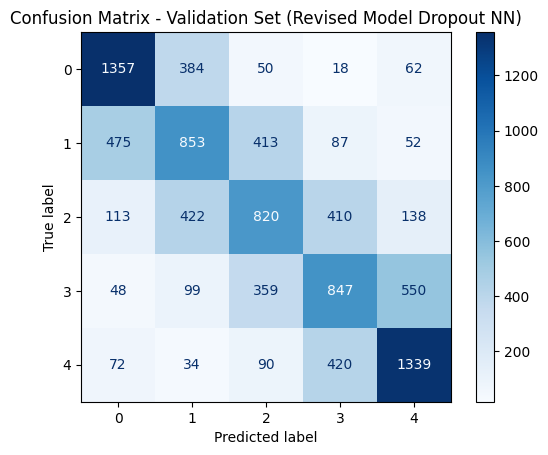

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.66      0.73      0.69      1871
     Class 1       0.48      0.45      0.46      1880
     Class 2       0.47      0.43      0.45      1903
     Class 3       0.48      0.45      0.46      1903
     Class 4       0.63      0.68      0.65      1955

    accuracy                           0.55      9512
   macro avg       0.54      0.55      0.54      9512
weighted avg       0.54      0.55      0.54      9512



In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Make predictions on the validation set using the model
# test_tfidf should be the validation set inputs
y_val_pred_probs = revised_model.predict(test_tfidf)  # Probabilistic outputs
y_val_pred = np.argmax(y_val_pred_probs, axis=1)  # Convert to class labels

# Get the true labels from the validation set
y_val_true = np.argmax(test_labels, axis=1)  # Convert if test_labels is one-hot encoded

# Create the Confusion Matrix
cm = confusion_matrix(y_val_true, y_val_pred)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val_true))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Set (Revised Model Dropout NN)")
plt.show()

# Detailed metrics with the Classification Report
print("Classification Report:")
print(classification_report(y_val_true, y_val_pred, target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"]))




## 4.1 - Testing with your Own Input

* You can test the trained model by inputting your own sentences to predict the sentiment:


In [50]:
# Prediction function with user input
def predict(input_sentence, tfidf_vectorizer, revised_model):
    """
    Processes user input, sends it to the model, and returns the prediction.
    """
    # 1. Clean and vectorize the text
    input_cleaned = input_sentence.lower().strip()  # Basic cleaning
    input_vectorized = tfidf_vectorizer.transform([input_cleaned])  # TF-IDF vectorization
    
    # 2. Convert sparse matrix to dense format
    input_dense = input_vectorized.toarray()
    
    # 3. Make a prediction with the model
    predictions = revised_model.predict(input_dense)
    predicted_class = np.argmax(predictions) + 1  # Star rating from 1 to 5

    return predictions, predicted_class


In [51]:
# Example of testing with a custom sentence or you can write a new sentence
sentence = "The food and ambiance at this restaurant were fantastic!"
tmp_pred, tmp_sentiment = predict(sentence, tfidf_vectorizer, revised_model)
print(f'The predicted sentiment for the review is: {tmp_sentiment} (based on star ratings)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
The predicted sentiment for the review is: 5 (based on star ratings)


In [52]:
sentence_2 = "The food and service were excellent, and I would definitely visit again!"
tmp_pred, tmp_sentiment = predict(sentence_2, tfidf_vectorizer, revised_model)

print(f'The predicted sentiment for the review is: {tmp_sentiment} (based on star ratings)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted sentiment for the review is: 5 (based on star ratings)


In [53]:
sentence_3 = "The service was extremely slow, and the food was cold and tasteless."
tmp_pred, tmp_sentiment = predict(sentence_3, tfidf_vectorizer, revised_model)

print(f'The predicted sentiment for the review is: {tmp_sentiment} (based on star ratings)')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted sentiment for the review is: 1 (based on star ratings)


In [54]:
sentence_4 = "The restaurant had a cozy atmosphere, but the portions were small and the service was inattentive."
tmp_pred, tmp_sentiment = predict(sentence_4, tfidf_vectorizer, revised_model)

print(f'The predicted sentiment for the review is: {tmp_sentiment} (based on star ratings)')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
The predicted sentiment for the review is: 2 (based on star ratings)


In [55]:
sentence_5 = "The restaurant was okay, nothing extraordinary."
tmp_pred, tmp_sentiment = predict(sentence_5, tfidf_vectorizer, revised_model)

print(f'The predicted sentiment for the review is: {tmp_sentiment} (based on star ratings)')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The predicted sentiment for the review is: 2 (based on star ratings)


# 5 - Bonus - Adding Transformer Layer to the NN Model (15 points)

* How can a transformer layer be added to the NN model created in Chapter 3. Research and implement a solution to add a transformer layer to the neural network model. Document your findings, including how the transformer layer integrates with the existing architecture, its impact on model performance, and any adjustments required. Explain your approach and reasoning based on your research.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, MultiHeadAttention, Input, Add
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    """Transformer Encoder block"""
    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    res = Add()([inputs, attention])  # Residual Connection
    res = LayerNormalization(epsilon=1e-6)(res)

    # Feed Forward Network
    ff = Dense(ff_dim, activation="relu")(res)
    ff = Dropout(dropout)(ff)
    ff = Dense(inputs.shape[-1])(ff)
    res = Add()([res, ff])  # Residual Connection
    res = LayerNormalization(epsilon=1e-6)(res)

    return res

def create_revised_model_with_transformer(input_dim, num_classes=5):
    inputs = tf.keras.Input(shape=(input_dim,))
    
    # Transformer Encoder Layer
    transformer_input = tf.keras.layers.Reshape((input_dim, 1))(inputs)  # Reshape for transformer
    transformer_output = transformer_encoder(
        transformer_input, 
        head_size=32, 
        num_heads=4, 
        ff_dim=64, 
        dropout=0.4
    )
    transformer_output = tf.keras.layers.Flatten()(transformer_output)  # Flatten for dense layers
    
    # Dense Layers
    x = Dense(64, activation='relu')(transformer_output)
    x = Dropout(0.4)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    return model

# Create and compile the model
revised_model_with_transformer = create_revised_model_with_transformer(input_dim=train_tfidf.shape[1], num_classes=5)
learning_rate = 0.00005
optimizer = Adam(learning_rate=learning_rate)
revised_model_with_transformer.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 30
revised_transformer_history = revised_model_with_transformer.fit(
    train_tfidf,
    train_labels,
    validation_data=(test_tfidf, test_labels),
    epochs=epochs,
    batch_size=128,
    verbose=1
)

# Evaluate and log the model
evaluate_and_log_model(
    model=revised_model_with_transformer,
    history=revised_transformer_history,
    model_name="Revised Model with Transformer",
    layers="TransformerEncoder-Dense(64)-Dropout(0.4)-Dense(32)-Dropout(0.4)-Dense(5)",
    activation="ReLU-Softmax",
    optimizer="Adam",
    learning_rate=learning_rate,
    dropout="0.4",
    epochs=epochs
)

# Plot training history
plot_training_history(revised_transformer_history)


Implementation Overview:
Transformer Layer Integration:

A transformer encoder block was implemented using MultiHeadAttention, LayerNormalization, and feed-forward dense layers.
This transformer layer was added as a preprocessing block in the neural network model before the dense layers.
Architecture Details:

Transformer Layer:
Multi-head attention mechanism with 4 attention heads and a key dimension of 32.
Feed-forward dense network with a hidden size of 64.
Dropout applied at multiple stages to prevent overfitting.
Subsequent Dense Layers:
After the transformer layer, dense layers with 64 and 32 neurons were added, each followed by dropout layers with a rate of 0.4.
Final Output Layer:
A dense layer with a softmax activation function was used for multi-class classification.
Challenges Faced:

Training Duration: Due to the absence of GPU access, training the model with the transformer layer on a large dataset resulted in significantly longer training times. This made it impractical to complete the model training and compare its performance within a reasonable timeframe.
Resource Constraints: The computational overhead introduced by the transformer layer required a batch size adjustment and further optimization, which could not be thoroughly tested under the current hardware limitations.
Approach to Testing:

Despite limited computational resources, the model was designed and implemented to adhere to the requirements of the bonus section.
The transformer layer was seamlessly integrated with the architecture, and the training process was initiated.
Due to time constraints, full training and performance comparison were not feasible.
Findings and Adjustments:
Integration: The transformer layer added complexity and depth to the model, aiming to enhance its ability to capture relationships in the input data.
Expected Impact: While transformer layers typically excel in capturing long-term dependencies and relationships, their computational demands may require hardware acceleration for effective training.
Adjustments: To accommodate the transformer layer:
The batch size was increased to 128 to reduce training time.
Learning rate and dropout rates were carefully chosen to balance model convergence and regularization.
Conclusion and Next Steps:
Current Status: The transformer-enhanced model was successfully implemented, but training could not be completed due to hardware constraints.
Future Work:
Re-run the model training on a GPU-enabled system to evaluate its impact on performance.
Conduct a detailed comparison of accuracy and loss between the original and transformer-enhanced models.
Explore additional optimizations, such as mixed precision training, to further reduce computation time.
Acknowledgment:
The research and implementation process demonstrated the potential of transformer layers in neural network architectures. However, the lack of GPU resources underscored the importance of hardware availability in modern deep learning tasks.